In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('product_sales.csv')
df.shape
df.isnull().sum()

,0
week,0
sales_method,0
customer_id,0
nb_sold,0
revenue,1074
years_as_customer,0
nb_site_visits,0
state,0


In [ ]:
df.dropna(subset=['revenue'], inplace=True)
df.shape

(13926, 8)

In [ ]:
df.nunique()

,0
week,6
sales_method,5
customer_id,13926
nb_sold,10
revenue,6743
years_as_customer,42
nb_site_visits,26
state,50


In [ ]:
for x in df.columns:
  print(f"Value counts for column: {x}")
  print(df[x].value_counts())

Value counts for column: week
week
1    3497
4    2387
5    2366
2    2323
3    2257
6    1096
Name: count, dtype: int64
Value counts for column: sales_method
sales_method
Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: count, dtype: int64
Value counts for column: customer_id
customer_id
e4dad70a-b23b-407c-8bd3-e32ea00fae17    1
3998a98d-70f5-44f7-942e-789bb8ad2fe7    1
d1de9884-8059-4065-b10f-86eef57e4a44    1
10e6d446-10a5-42e5-8210-1b5438f70922    1
6489e678-40f2-4fed-a48e-d0dff9c09205    1
                                       ..
0b026b91-fe12-4af0-86f9-387ba81c8fdb    1
c20ab049-cbac-4ba7-8868-310aa89e0549    1
c40f2602-8a7c-429e-bf13-cb1ec9e5f92f    1
56491dae-bbe7-49f0-a651-b823a01103d8    1
771586bd-7b64-40be-87df-afe884d2af9e    1
Name: count, Length: 13926, dtype: int64
Value counts for column: nb_sold
nb_sold
10    3424
9     3316
11    2276
8     1838
12     961
13     846
7      681
15     461
14      93
16   

In [ ]:
df['sales_method'].unique()

array(['Email + Call', 'Call', 'Email', 'em + call', 'email'],
      dtype=object)

In [ ]:
mapping = {'Email + Call': 'Email + Call',
           'em + call': 'Email + Call',
           'email':'Email',
           'Email':'Email',
           'Call':'Call'}
df['sales_method'] = df['sales_method'].replace(mapping)

In [ ]:
df['sales_method'].nunique()
df['sales_method'].unique()

array(['Email + Call', 'Call', 'Email'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [ ]:
print(df['revenue'].describe(),
df1['revenue'].describe(),
df2['revenue'].describe(),
df3['revenue'].describe())


count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64 count    6922.000000
mean       97.127684
std        11.210469
min        78.830000
25%        87.880000
50%        95.580000
75%       105.170000
max       148.970000
Name: revenue, dtype: float64 count    2223.000000
mean      183.651233
std        29.083924
min       122.110000
25%       155.775000
50%       184.740000
75%       191.110000
max       238.320000
Name: revenue, dtype: float64 count    4781.000000
mean       47.597467
std         8.609899
min        32.540000
25%        41.470000
50%        49.070000
75%        52.680000
max        71.360000
Name: revenue, dtype: float64


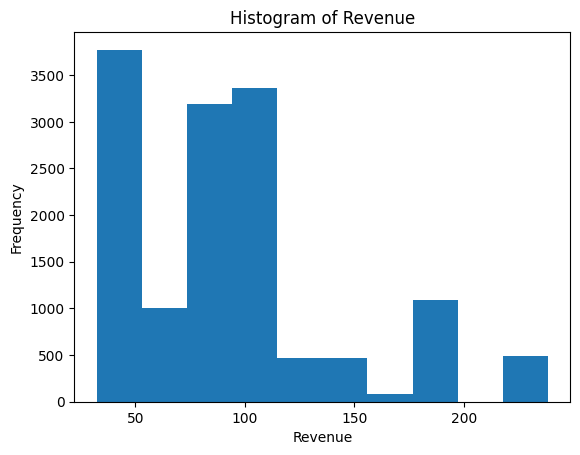

In [ ]:
plt.hist(df['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.show()

In [ ]:
df1 = df[df['sales_method'] == 'Email']
df2 = df[df['sales_method'] == 'Email + Call']
df3 = df[df['sales_method'] == 'Call']

dataframes = [('Email', df1), ('Email + Call', df2), ('Call', df3)]

for name, dataframe in dataframes:
    print(f"Description for Sales Method: {name}")
    display(dataframe['revenue'].describe())
    print("-" * 50)

Description for Sales Method: Email


,revenue
count,6922.000000
mean,97.127684
std,11.210469
min,78.830000
25%,87.880000
50%,95.580000
75%,105.170000
max,148.970000


--------------------------------------------------
Description for Sales Method: Email + Call


,revenue
count,2223.000000
mean,183.651233
std,29.083924
min,122.110000
25%,155.775000
50%,184.740000
75%,191.110000
max,238.320000


--------------------------------------------------
Description for Sales Method: Call


,revenue
count,4781.000000
mean,47.597467
std,8.609899
min,32.540000
25%,41.470000
50%,49.070000
75%,52.680000
max,71.360000


--------------------------------------------------


In [ ]:
def plot_histogram(data, xlabel, ylabel, title, bins=10):
  """Plots a histogram for the given data series.

  Args:
    data: The pandas Series to plot.
    xlabel: The label for the x-axis.
    ylabel: The label for the y-axis.
    title: The title of the histogram.
    bins: The number of bins for the histogram (default is 10).
  """
  plt.hist(data, bins=bins)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

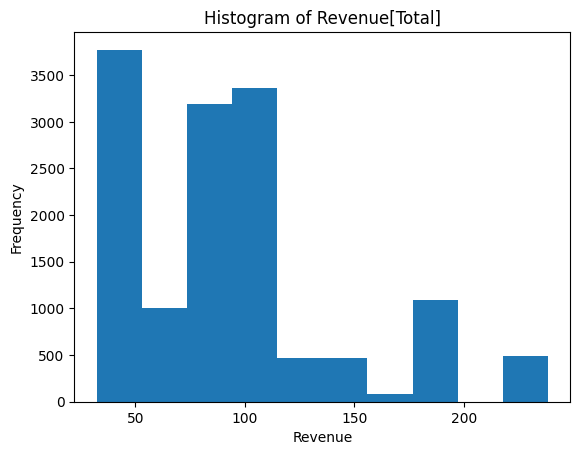

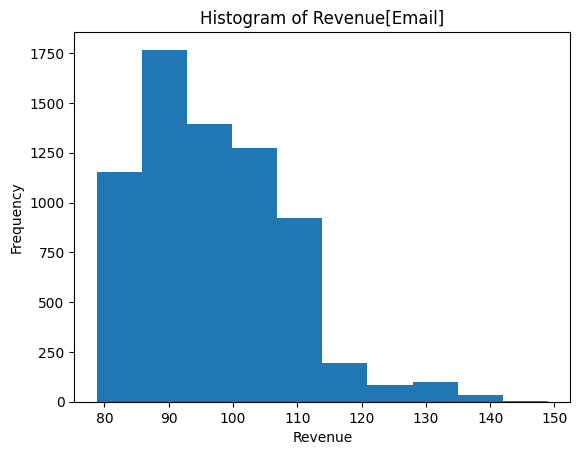

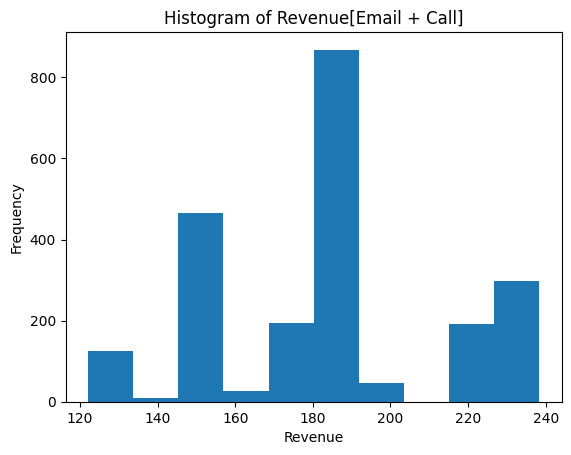

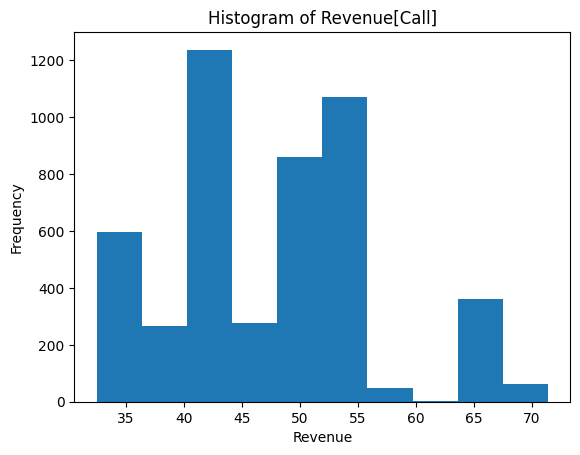

In [ ]:
plot_histogram(df['revenue'], 'Revenue', 'Frequency', 'Histogram of Revenue[Total]')
plot_histogram(df1['revenue'], 'Revenue', 'Frequency', 'Histogram of Revenue[Email]')
plot_histogram(df2['revenue'], 'Revenue', 'Frequency', 'Histogram of Revenue[Email + Call]')
plot_histogram(df3['revenue'], 'Revenue', 'Frequency', 'Histogram of Revenue[Call]')

In [ ]:
revenue_over_time = df.groupby('week')['revenue'].sum()
print(revenue_over_time)
revenue_over_time1 = df1.groupby('week')['revenue'].sum()
print(revenue_over_time1)
revenue_over_time2 = df2.groupby('week')['revenue'].sum()
print(revenue_over_time2)
revenue_over_time3 = df3.groupby('week')['revenue'].sum()
print(revenue_over_time3)

week
1    272810.06
2    198059.82
3    183776.55
4    235678.56
5    254701.28
6    163111.74
Name: revenue, dtype: float64
week
1    229765.55
2    137891.57
3     98792.14
4    107788.37
5     74373.45
6     23706.75
Name: revenue, dtype: float64
week
1     16885.33
2     26376.23
3     48737.14
4     78296.20
5    126809.72
6    111152.07
Name: revenue, dtype: float64
week
1    26159.18
2    33792.02
3    36247.27
4    49593.99
5    53518.11
6    28252.92
Name: revenue, dtype: float64


In [ ]:
def lineplot(data, x, y, title, xlabel, ylabel, grid):
  data = data.sort_values(by=x)
  sns.lineplot(x=x, y=y, data=data)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(grid)
  plt.show()

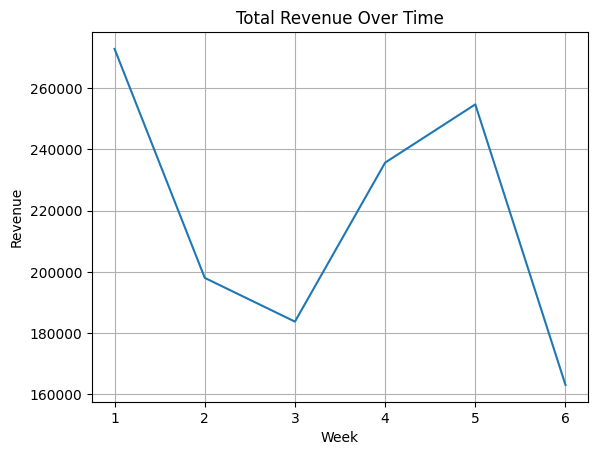

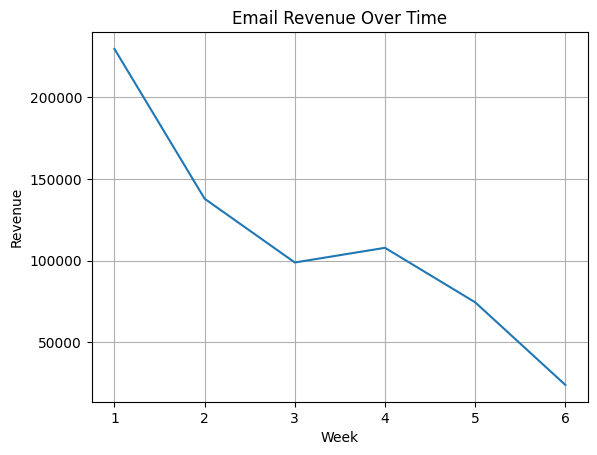

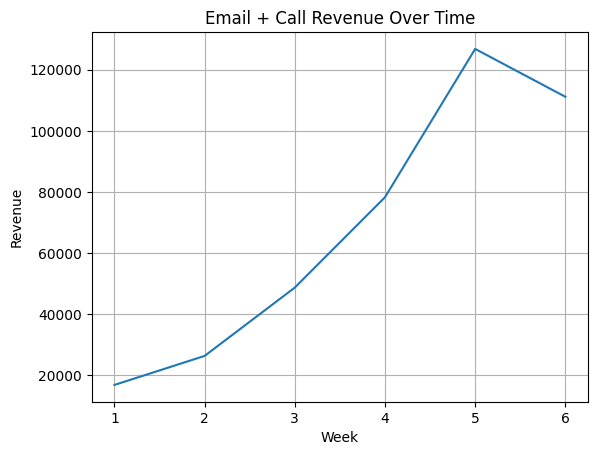

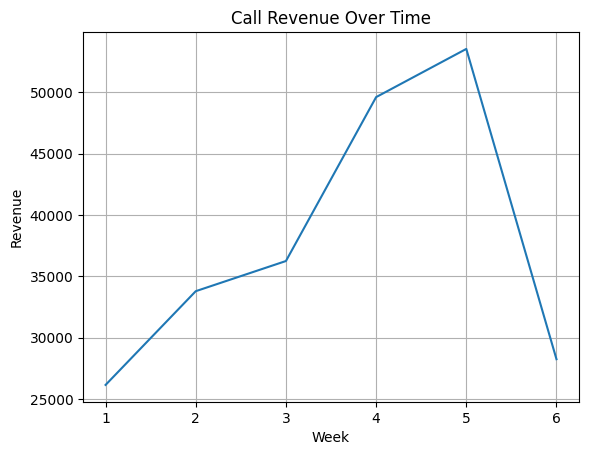

In [ ]:
lineplot(revenue_over_time.reset_index(), 'week', 'revenue', 'Total Revenue Over Time', 'Week', 'Revenue',True)
lineplot(revenue_over_time1.reset_index(), 'week', 'revenue', 'Email Revenue Over Time', 'Week', 'Revenue',True)
lineplot(revenue_over_time2.reset_index(), 'week', 'revenue', 'Email + Call Revenue Over Time', 'Week', 'Revenue',True)
lineplot(revenue_over_time3.reset_index(), 'week', 'revenue', 'Call Revenue Over Time', 'Week', 'Revenue',True)

In [ ]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [ ]:
df.groupby('state')[['revenue','nb_sold']].sum().sort_values(by = 'nb_sold', ascending=False)

,revenue,nb_sold
state,,
California,161040.89,17449
Texas,106294.45,11163
New York,83242.74,9045
Florida,77651.75,8361
Illinois,52649.35,5704
Pennsylvania,51595.35,5514
Ohio,48010.94,5210
Michigan,44424.81,4657
Georgia,43426.41,4607


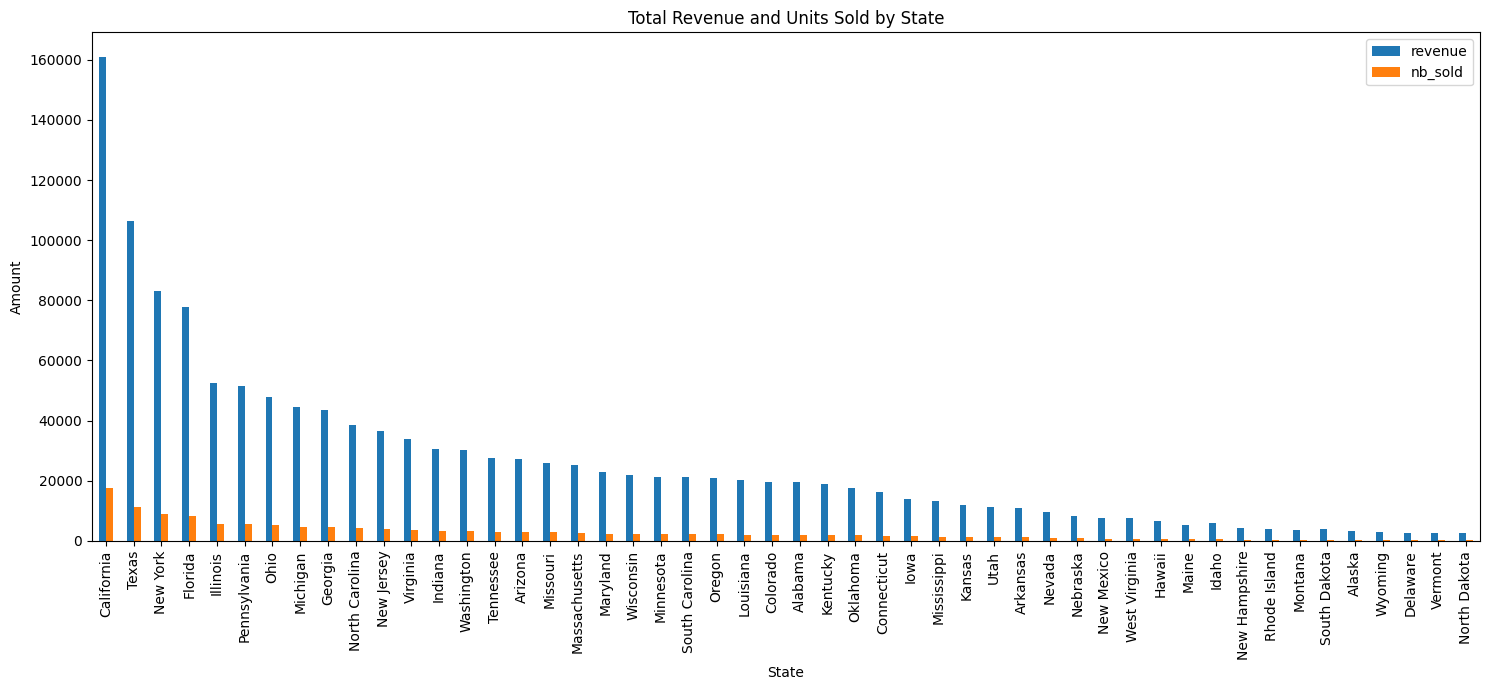

In [ ]:
state_performance = df.groupby('state')[['revenue','nb_sold']].sum().sort_values(by = 'nb_sold', ascending=False)

state_performance[['revenue', 'nb_sold']].plot(kind='bar', figsize=(15, 7))
plt.title('Total Revenue and Units Sold by State')
plt.xlabel('State')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('nb_site_visits')['nb_sold'].sum().sort_values(ascending=False)

,nb_sold
nb_site_visits,
26,15598
25,15519
24,14405
27,14223
23,13150
28,11531
22,10568
29,9174
21,7764


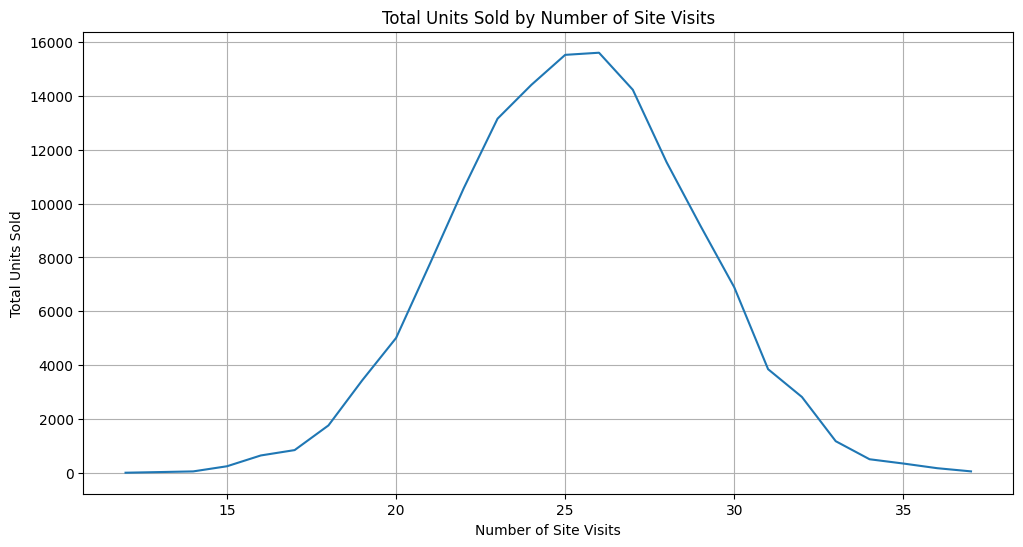

In [ ]:
site_visits_sales = df.groupby('nb_site_visits')['nb_sold'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='nb_site_visits', y='nb_sold', data=site_visits_sales)
plt.title('Total Units Sold by Number of Site Visits')
plt.xlabel('Number of Site Visits')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.show()

In [ ]:
df.groupby('years_as_customer')[['nb_sold','revenue']].sum().sort_values(by='revenue', ascending=False)

,nb_sold,revenue
years_as_customer,,
1,23865,223172.97
2,18555,175305.90
3,15209,143178.56
0,13975,137445.21
4,12396,116106.52
5,10413,96864.16
6,8557,79033.35
7,6516,59964.39
8,5439,50471.89


# Task
Define a metric for the business to monitor, explain how to monitor it, and estimate its initial value based on the current data.

## Define a relevant metric

### Subtask:
Based on the analysis of sales methods, revenue trends, and customer behavior, propose a key metric that aligns with business goals (e.g., average revenue per customer, customer lifetime value, conversion rate by sales method).


**Reasoning**:
Reviewing the previous analysis of sales methods, revenue trends, and customer behavior will help identify a relevant KPI. The analysis of sales methods showed significant differences in revenue generated by each method. Revenue over time indicated trends across weeks. State-wise performance highlighted geographical variations. The relationship between site visits and sales, and customer tenure and revenue, revealed insights into customer behavior. Based on these analyses, I can propose a key metric and define it.



In [ ]:
# The previous analysis has already been reviewed in the context.
# Based on the analysis of the different sales methods and their respective revenues,
# Average Revenue per Customer (ARPC) seems like a relevant metric.
# This metric directly reflects the effectiveness of each sales method in generating revenue per customer.

# Define the metric: Average Revenue per Customer (ARPC)
# ARPC is calculated as the total revenue divided by the total number of customers.
# It can also be calculated for each sales method to compare their effectiveness.

# Relevance of the metric:
# The analysis showed that 'Email + Call' method has the highest average revenue per customer,
# followed by 'Email' and then 'Call'. Monitoring ARPC by sales method
# will help the business understand which methods are most profitable
# and allocate resources accordingly. Monitoring overall ARPC will show
# the general trend of revenue generated per customer over time.

**Reasoning**:
The subtask is to propose a key metric, define it, and explain its relevance. I have already defined ARPC and explained its relevance in the previous step. I will now calculate the initial value of this metric to fully address the prompt.



In [ ]:
# Calculate the overall ARPC
total_revenue = df['revenue'].sum()
total_customers = df['customer_id'].nunique() # Assuming each customer_id is a unique customer
overall_arpc = total_revenue / total_customers
print(f"Overall Average Revenue per Customer (ARPC): ${overall_arpc:.2f}")

# Calculate ARPC for each sales method
arpc_by_sales_method = df.groupby('sales_method')['revenue'].sum() / df.groupby('sales_method')['customer_id'].nunique()
print("\nAverage Revenue per Customer (ARPC) by Sales Method:")
print(arpc_by_sales_method)

Overall Average Revenue per Customer (ARPC): $93.93

Average Revenue per Customer (ARPC) by Sales Method:
sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
dtype: float64


## Explain how to monitor the metric

### Subtask:
Suggest methods and frequency for tracking the chosen metric over time (e.g., dashboards, regular reporting, segmentation by sales method or customer group).


**Reasoning**:
Describe how the overall ARPC can be monitored over time, focusing on visualization and frequency. Then, explain how to monitor ARPC for each sales method and suggest ways to visualize this comparison. Finally, briefly discuss potential segmentations for monitoring ARPC beyond just sales methods.



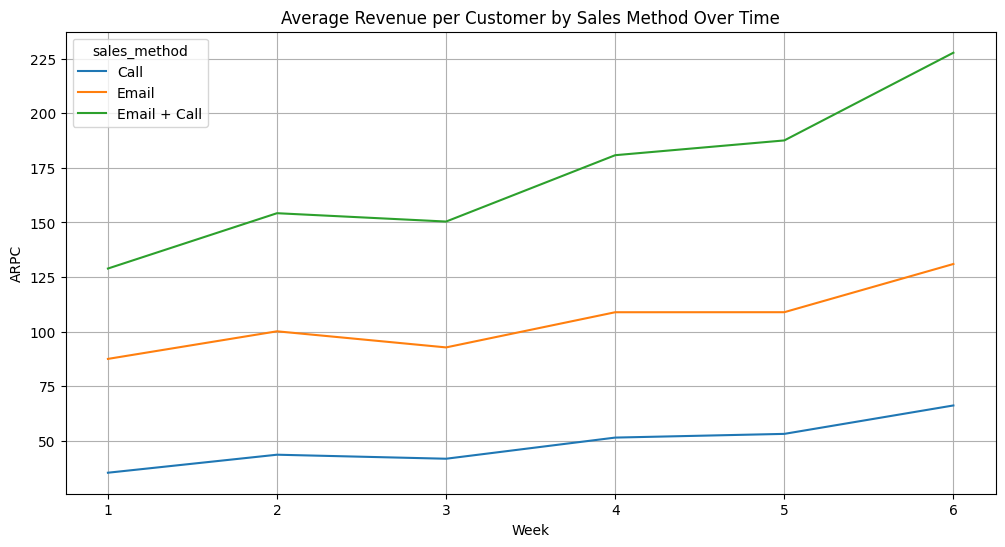

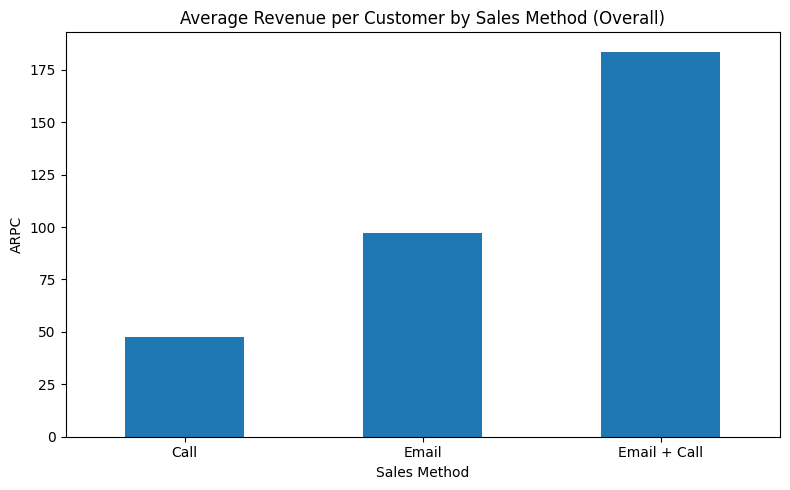

In [ ]:
# 1. Monitoring Overall ARPC over time
# The overall ARPC can be monitored by calculating it for each week (or another relevant time period).
# A line plot showing the overall ARPC over the weeks would be an effective visualization.
# The frequency of monitoring could be weekly, aligning with the data provided.

# 2. Monitoring ARPC for each sales method
# Similarly, ARPC for each sales method should be calculated for each week.
# To compare the performance of different sales methods, a line plot with different lines for each sales method is recommended.
# This allows for a clear visual comparison of how the ARPC for each method changes over time.
# Another useful visualization would be a bar plot comparing the average ARPC for each sales method over the entire period.

# 3. Potential segmentations for monitoring ARPC
# Based on the previous analysis, other potential segmentations for monitoring ARPC include:
# - Customer tenure: Analyzing ARPC based on how long customers have been with the business could reveal insights into customer loyalty and value over time.
# - State: Monitoring ARPC by state can help identify geographical variations in revenue generation and potentially inform targeted marketing strategies.
# These segmentations can be monitored using similar visualization techniques (line plots for trends over time, bar plots for comparisons).

# The actual implementation of these monitoring methods would involve:
# - Aggregating data by the chosen time period (e.g., week) and segmentation (e.g., sales_method, years_as_customer, state).
# - Calculating ARPC for each group.
# - Creating visualizations (line plots, bar plots) to display the trends and comparisons.
# - Setting up a regular reporting schedule (e.g., weekly) to review the dashboards or reports.

# Example implementation for monitoring ARPC by sales method over time
arpc_by_sales_method_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
customer_count_by_sales_method_over_time = df.groupby(['week', 'sales_method'])['customer_id'].nunique().reset_index()

# Merge the two dataframes to calculate ARPC over time by sales method
arpc_over_time_merged = pd.merge(arpc_by_sales_method_over_time, customer_count_by_sales_method_over_time, on=['week', 'sales_method'])
arpc_over_time_merged['ARPC'] = arpc_over_time_merged['revenue'] / arpc_over_time_merged['customer_id']

# Visualize ARPC by sales method over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='ARPC', hue='sales_method', data=arpc_over_time_merged)
plt.title('Average Revenue per Customer by Sales Method Over Time')
plt.xlabel('Week')
plt.ylabel('ARPC')
plt.grid(True)
plt.show()

# Visualize average ARPC by sales method over the entire period (already calculated as arpc_by_sales_method)
plt.figure(figsize=(8, 5))
arpc_by_sales_method.plot(kind='bar')
plt.title('Average Revenue per Customer by Sales Method (Overall)')
plt.xlabel('Sales Method')
plt.ylabel('ARPC')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Estimate the initial value of the metric

### Subtask:
Calculate the current value of the defined metric using the provided data.


**Reasoning**:
Calculate the overall ARPC and ARPC for each sales method as requested by the instructions.



In [ ]:
# Calculate the overall ARPC
total_revenue = df['revenue'].sum()
total_customers = df['customer_id'].nunique()
overall_arpc = total_revenue / total_customers
print(f"Overall Average Revenue per Customer (ARPC): ${overall_arpc:.2f}")

# Calculate ARPC for each sales method
revenue_by_sales_method = df.groupby('sales_method')['revenue'].sum()
customer_count_by_sales_method = df.groupby('sales_method')['customer_id'].nunique()
arpc_by_sales_method = revenue_by_sales_method / customer_count_by_sales_method

print("\nAverage Revenue per Customer (ARPC) by Sales Method:")
print(arpc_by_sales_method)

Overall Average Revenue per Customer (ARPC): $93.93

Average Revenue per Customer (ARPC) by Sales Method:
sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
dtype: float64


## Summary:

### Data Analysis Key Findings

*   The chosen metric to monitor is Average Revenue per Customer (ARPC), calculated as total revenue divided by the total number of customers.
*   The initial overall ARPC based on the current data is \$93.93.
*   ARPC varies significantly by sales method: Call (\$47.60), Email (\$97.13), and Email + Call (\$183.65).

### Insights or Next Steps

*   Monitor ARPC by sales method weekly using line plots to track trends and identify the most effective methods.
*   Consider segmenting ARPC analysis by customer tenure and state to gain further insights into customer value and geographical variations.
